In [83]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

df = pd.read_csv("annonimized.csv")  # ví dụ: "data.csv"
ck=pd.read_csv("ck-public.csv")
df.head()

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [84]:
df.rename(columns={
    "concat('it001',`assignment_id`)": 'assignment_id',
    "concat('it001',`problem_id`)": 'problem_id',
    "concat('it001', username)": 'username',
    "concat('it001',`language_id`)":'language_id'
}, inplace=True)
ck.rename(columns={
    "hash": "username",
}, inplace=True)
df.head()

,assignment_id,problem_id,username,is_final,status,pre_score,coefficient,language_id,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   assignment_id  295198 non-null  object
 1   problem_id     295198 non-null  object
 2   username       295198 non-null  object
 3   is_final       295198 non-null  int64 
 4   status         295198 non-null  object
 5   pre_score      295198 non-null  int64 
 6   coefficient    295198 non-null  int64 
 7   language_id    295198 non-null  object
 8   created_at     295198 non-null  object
 9   updated_at     295198 non-null  object
 10  judgement      295198 non-null  object
dtypes: int64(3), object(8)
memory usage: 24.8+ MB


In [86]:
#Dữ liệu gồm 295,198 dòng và 11 cột
#Không có giá trị nào bị thiếu (NaN), vì tất cả các cột đều có:

In [87]:
# Lấy điểm cao nhất của mỗi sinh viên cho từng cặp (assignment_id, problem_id)
# Điều này giúp loại bỏ việc cộng trùng điểm do nộp nhiều lần cho cùng một bài
best_submissions = df.groupby(["username", "assignment_id", "problem_id"])["pre_score"].max().reset_index()

# Tính tổng điểm của mỗi sinh viên dựa trên các bài có điểm cao nhất
total_score_per_user = best_submissions.groupby("username")["pre_score"].sum().rename("total_score")

# Trích xuất các đặc trưng hành vi học tập cho từng sinh viên
features0 = df.groupby("username").agg(
    submission_count = ("problem_id", "count"),              # Tổng số lượt nộp bài (kể cả nộp nhiều lần)
    assignment_count = ("assignment_id", pd.Series.nunique), # Số lượng assignment đã tham gia
    problem_count = ("problem_id", pd.Series.nunique),       # Số lượng problem khác nhau đã làm
    language_count = ("language_id", pd.Series.nunique),     # Số ngôn ngữ lập trình đã sử dụng
).reset_index()

# Gộp tổng điểm cao nhất vào bảng đặc trưng
features0 = features0.merge(total_score_per_user, on="username", how="left")

# Tính điểm trung bình cho mỗi problem (dựa trên tổng điểm cao nhất và số problem khác nhau)
features0["avg_score_per_problem"] = features0["total_score"] / features0["problem_count"]

# Hiển thị bảng đặc trưng đầu ra
features0.head()




,username,submission_count,assignment_count,problem_count,language_count,total_score,avg_score_per_problem
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,7,46,1,470000,10217.391304
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,9,78,1,752499,9647.423077
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,7,66,1,631014,9560.818182
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,4,47,1,470000,10000.000000
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,8,52,1,605626,11646.653846


In [88]:
df_merged0 = pd.merge(features0,ck, on="username", how="inner")
df_merged0

,username,submission_count,assignment_count,problem_count,language_count,total_score,avg_score_per_problem,CK
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,7,46,1,470000,10217.391304,5.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,9,78,1,752499,9647.423077,6.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,7,66,1,631014,9560.818182,4.5
3,013de369c439ab0ead8aa7da64423aa395a8be39,107,8,52,1,605626,11646.653846,5.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,199,9,90,1,796000,8844.444444,4.0
...,...,...,...,...,...,...,...,...
756,840d07858c03f80f4695056e2cc7d0c474b83a25,111,6,43,1,434000,10093.023256,5.5
757,844f5db2e7e31ae51eba025480679ed7e4708ac6,357,17,104,1,1031846,9921.596154,6.0
758,845acd04a77b3d1b623f255d9f9f8eae90892dab,155,8,52,1,480666,9243.576923,6.0
759,8460eaaf887a6289fb156f7562fb739ba8e9629e,557,12,114,1,1106000,9701.754386,7.0


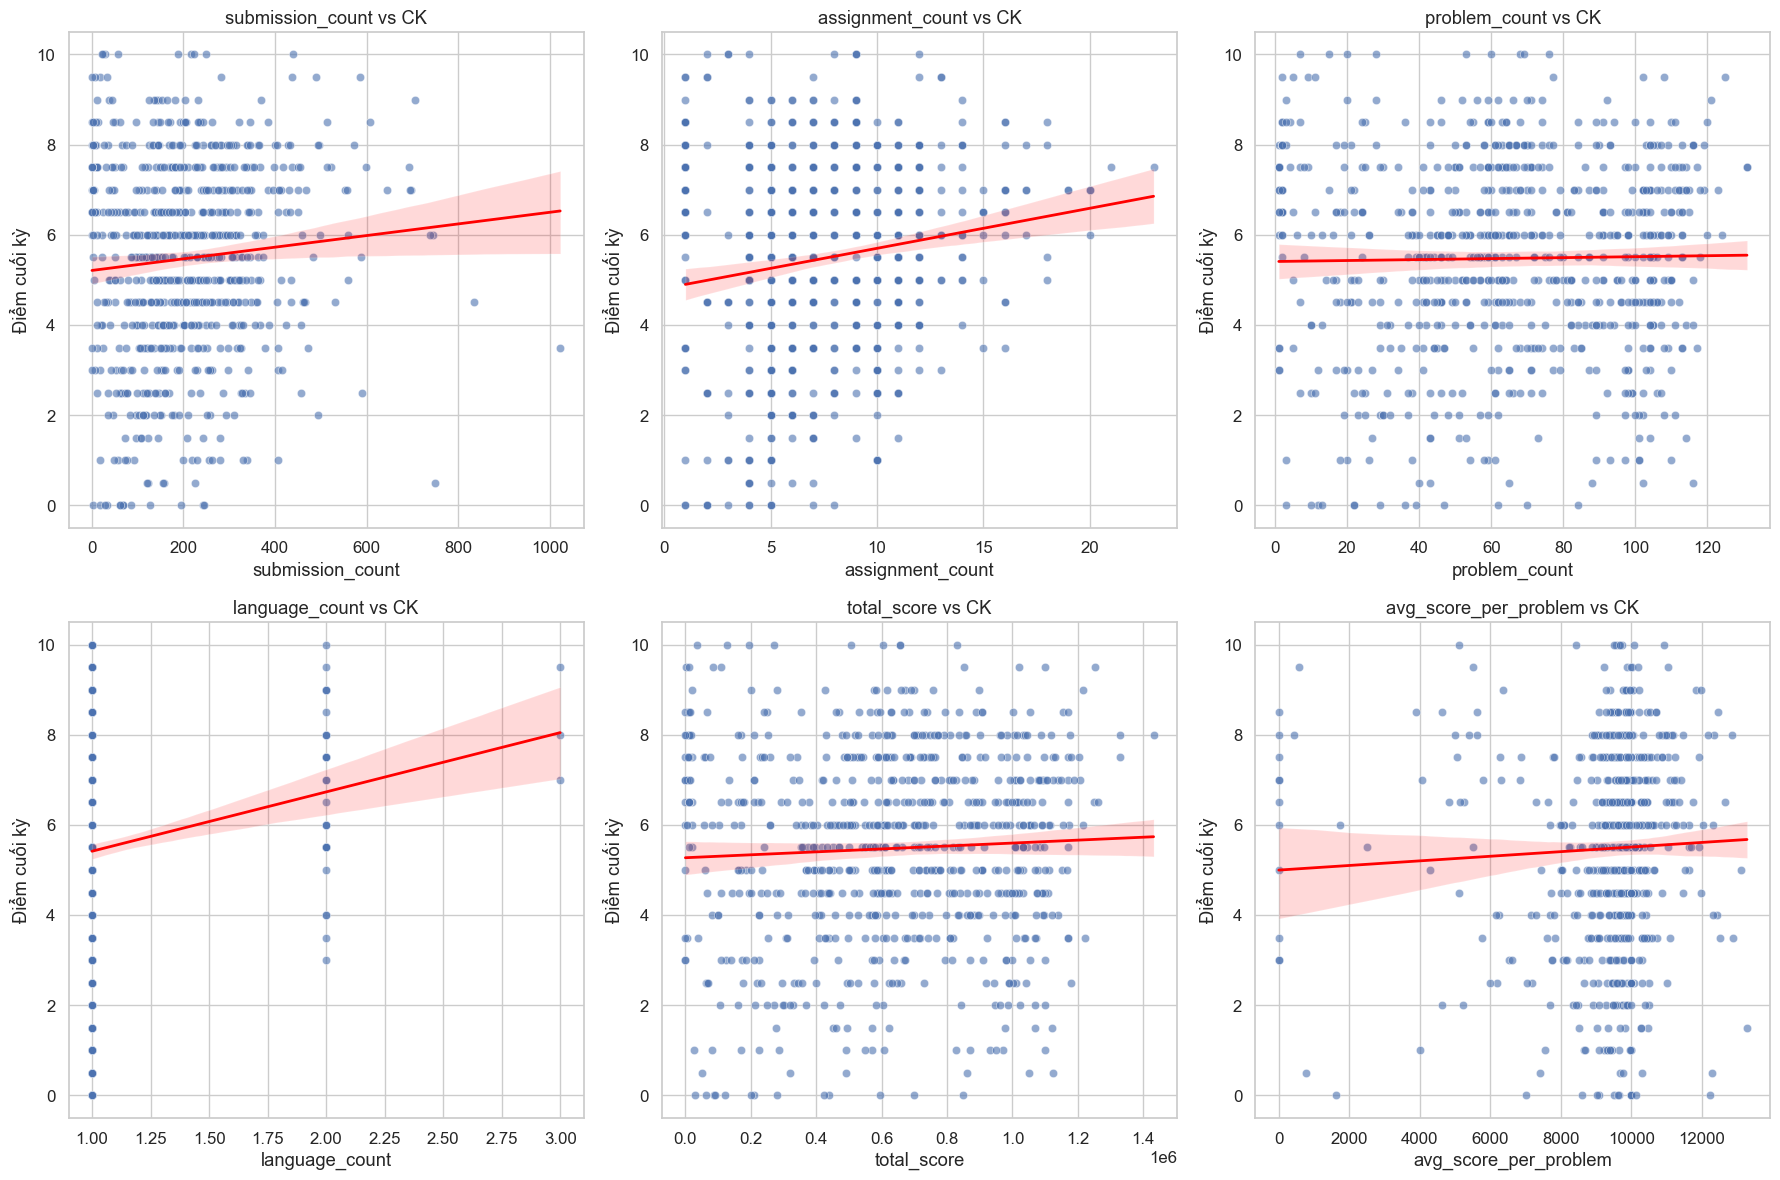

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Đặt kiểu biểu đồ đẹp
sns.set(style="whitegrid", font_scale=1.1)

# Danh sách các đặc trưng muốn so sánh với CK
features_to_plot = [
    "submission_count",
    "assignment_count",
    "problem_count",
    "language_count",
    "total_score",
    "avg_score_per_problem"
]

# Tạo biểu đồ dạng grid
plt.figure(figsize=(18, 12))

for idx, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, idx)
    sns.scatterplot(data=df_merged0, x=feature, y="CK", alpha=0.6)
    sns.regplot(data=df_merged0, x=feature, y="CK", scatter=False, color="red", line_kws={"linewidth": 2})
    plt.title(f"{feature} vs CK")
    plt.xlabel(feature)
    plt.ylabel("Điểm cuối kỳ")

plt.tight_layout()
plt.show()

In [90]:
# -ta thấy rằng các thuộc tính cơ bản như submission_count ,assignment_count,avg_score_per_problem,total_score sẽ biểu thị sự chăm chỉ của sinh viên . Sinh viên 
# nào chăm làm bài thì sẽ được điểm cao và ngược lại 
# -đặc trưng language_count do đây là nhập môn lập trình nên chỉ dùng một ngôn ngữ các ngôn ngữ khác chắc do sinh viên nộp sai nên mặc dù biểu đồ nó tăng 
# nhưng sẽ không ảnh hưởng đến trình độ sinh viên 
# - Tuy nhiên không phải chăm chỉ nỗ lực làm bài nhiều là điểm sẽ cao nó còn phải phụ thuộc và độ chính xác,số lần nộp đúng nhiều, thời gian nộp bài 
# sớm hay trễ và đúng nhiều hay ít lúc nộp nên chúng em sẽ thêm các thuộc tính sau  

In [91]:
# Tính điểm có trọng số cho mỗi lượt nộp: điểm * hệ số
df["weighted_score"] = df["pre_score"] * df["coefficient"]

# Lấy điểm cao nhất mà mỗi sinh viên đạt được cho từng bài lập trình (problem)
max_scores = df.groupby(["username", "problem_id"])["pre_score"].max().reset_index()

# Tổng điểm cao nhất của từng sinh viên trên tất cả các bài khác nhau
max_total_score = max_scores.groupby("username")["pre_score"].sum().rename("max_score_each_problem")

# Trích xuất các đặc trưng cơ bản cho mỗi sinh viên
features1 = df.groupby("username").agg(
    submission_count = ("problem_id", "count"),               # Tổng số lượt nộp bài (kể cả trùng)
    assignment_count = ("assignment_id", pd.Series.nunique),  # Số lượng assignment khác nhau đã làm
    problem_count = ("problem_id", pd.Series.nunique),        # Số bài lập trình khác nhau đã làm
    final_submission_ratio = ("is_final", lambda x: x.sum() / len(x)),  # Tỷ lệ nộp bài được đánh dấu là cuối cùng
    success_submission_ratio = ("pre_score", lambda x: (x > 0).sum() / len(x)),  # Tỷ lệ nộp bài có điểm > 0
    avg_score = ("pre_score", "mean"),                        # Điểm trung bình trên tất cả lượt nộp
    avg_score_weighted = ("weighted_score", "mean"),          # Điểm trung bình có tính trọng số hệ số bài
).reset_index()

# Gộp thêm tổng điểm cao nhất mỗi bài để có thước đo chất lượng tốt nhất
features2 = features1.merge(max_total_score, on="username", how="left")

# Xem bảng đặc trưng cuối cùng
features2.head()


,username,submission_count,assignment_count,problem_count,final_submission_ratio,success_submission_ratio,avg_score,avg_score_weighted,max_score_each_problem
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,7,46,0.312925,0.625850,5504.149660,550414.965986,460000
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,9,78,0.301158,0.679537,5488.552124,548855.212355,752499
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,7,66,0.343590,0.774359,5973.753846,597375.384615,615300
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,4,47,0.470000,0.660000,5952.760000,595276.000000,470000
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,8,52,0.616822,0.785047,6474.448598,641871.028037,465626


In [92]:
df_merged1 = pd.merge(features2,ck, on="username", how="inner")
df_merged1

,username,submission_count,assignment_count,problem_count,final_submission_ratio,success_submission_ratio,avg_score,avg_score_weighted,max_score_each_problem,CK
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,7,46,0.312925,0.625850,5504.149660,550414.965986,460000,5.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,9,78,0.301158,0.679537,5488.552124,548855.212355,752499,6.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,7,66,0.343590,0.774359,5973.753846,597375.384615,615300,4.5
3,013de369c439ab0ead8aa7da64423aa395a8be39,107,8,52,0.616822,0.785047,6474.448598,641871.028037,465626,5.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,199,9,90,0.452261,0.582915,5240.025126,524002.512563,796000,4.0
...,...,...,...,...,...,...,...,...,...,...
756,840d07858c03f80f4695056e2cc7d0c474b83a25,111,6,43,0.396396,0.639640,5171.639640,517163.963964,414000,5.5
757,844f5db2e7e31ae51eba025480679ed7e4708ac6,357,17,104,0.291317,0.588235,4785.224090,478522.408964,1031846,6.0
758,845acd04a77b3d1b623f255d9f9f8eae90892dab,155,8,52,0.341935,0.541935,4247.296774,424729.677419,474000,6.0
759,8460eaaf887a6289fb156f7562fb739ba8e9629e,557,12,114,0.206463,0.624776,4278.605027,427860.502693,1106000,7.0


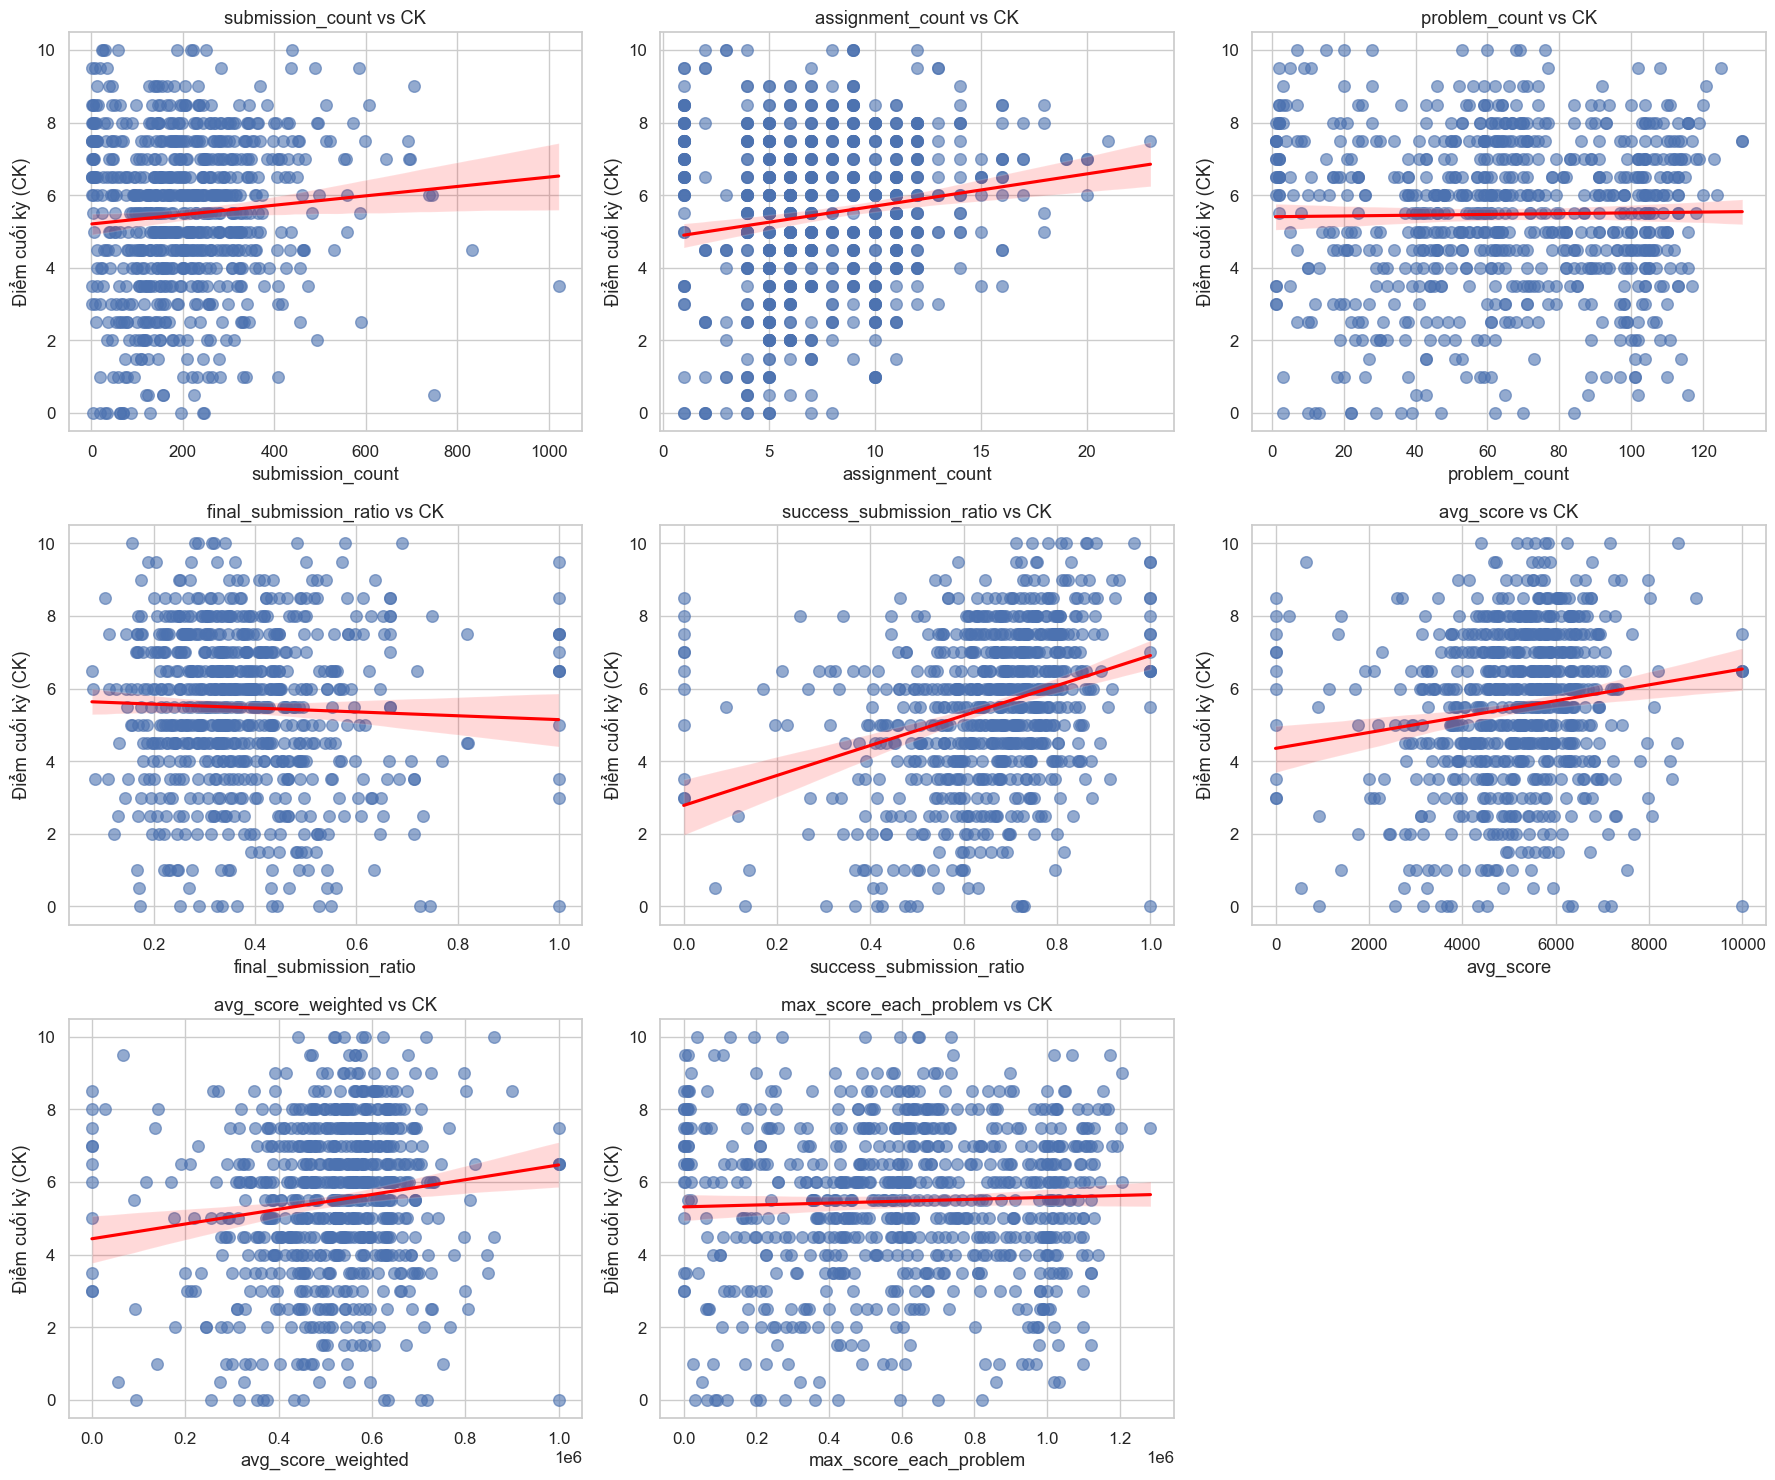

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Giả sử df_merged đã chứa tất cả các feature + cột "CK"
df = pd.DataFrame(df_merged1)

# Các đặc trưng muốn so sánh với CK
features = [
    "submission_count", "assignment_count", "problem_count",
    "final_submission_ratio", "success_submission_ratio", 
    "avg_score", "avg_score_weighted", "max_score_each_problem"
]

# Thiết lập kích thước và số hàng/cột phù hợp
n = len(features)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(6 * cols, 5 * rows))
for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.regplot(
        x=feature, y="CK", data=df,
        scatter_kws={'s': 70, 'alpha': 0.6}, 
        line_kws={'color': 'red'}
    )
    plt.title(f"{feature} vs CK")
    plt.xlabel(feature)
    plt.ylabel("Điểm cuối kỳ (CK)")
plt.tight_layout()
plt.show()


In [94]:
# 1. Xoá các dòng thiếu điểm CK
df_merged2 = df_merged1.dropna(subset=["CK"])

# 2. Chia X, y
X = df_merged2.drop(columns=["CK", "username",])
y = df_merged2["CK"]

# 3. Chia tập train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# 🔄 4. Scale dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Huấn luyện Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# 6. Dự đoán và đánh giá
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_test_scaled)
print("📊 MAE:", mean_absolute_error(y_test, y_pred))
print("📈 R²:", r2_score(y_test, y_pred))

📊 MAE: 1.6144996972094243
📈 R²: 0.1754143808191556


In [95]:
# Đảm bảo không có cột dư thừa (CK hoặc index)
features3 = features2.reset_index() if features1.index.name == "username" else features1.copy()
features3 = features2.drop(columns=[col for col in ["index", "CK"] if col in features1.columns])

# Scale đúng các cột đặc trưng ban đầu
X_new = features3.drop(columns=["username"])
X_new_scaled = scaler.transform(X_new)

# Dự đoán
features1["CK"] = model.predict(X_new_scaled).round(1)

# Xuất ra file
features1[["username", "CK"]].to_csv("linear_ck.csv", index=False)


               Model       MAE        R²
2                SVR  1.510702  0.249899
1      Random Forest  1.595689  0.211280
0  Linear Regression  1.614500  0.175414


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12384\727423919.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R²", palette="viridis")


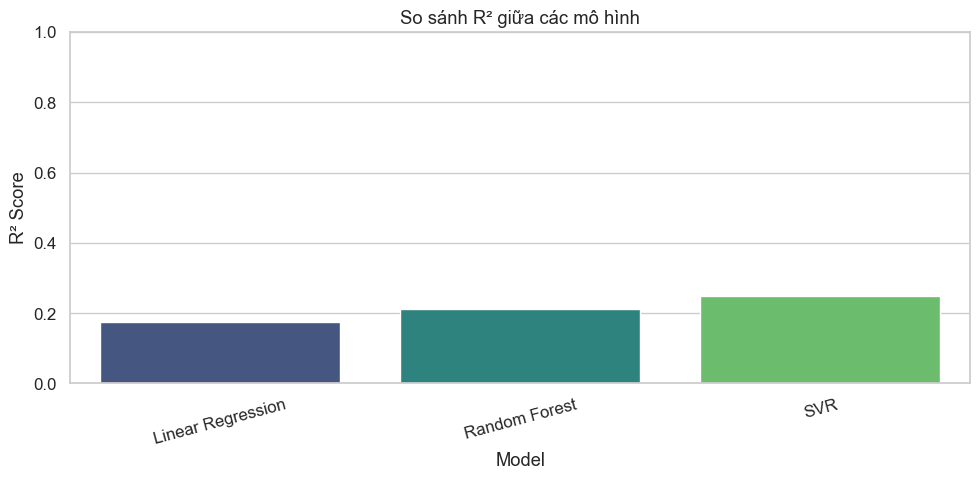

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Xoá các dòng thiếu điểm CK
df_merged3 = df_merged2.dropna(subset=["CK"])

# 2. Chia X, y
X = df_merged3.drop(columns=["CK", "username"])
y = df_merged3["CK"]

# 3. Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# 4. Scale dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Khởi tạo và huấn luyện nhiều model
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR": SVR(),
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MAE": mae, "R²": r2})

# 6. Hiển thị kết quả
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="R²", ascending=False))

# 📊 (Tùy chọn) Vẽ biểu đồ so sánh
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="R²", palette="viridis")
plt.title("So sánh R² giữa các mô hình")
plt.ylim(0, 1)
plt.ylabel("R² Score")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [101]:
# Đảm bảo không có cột dư thừa (tránh lỗi scale)
features4 = features2.reset_index() if features2.index.name == "username" else features2.copy()
features4 = features2.drop(columns=[col for col in ["index", "CK"] if col in features2.columns])

# Lấy tập đặc trưng để dự đoán (loại bỏ cột username)
X_new = features4.drop(columns=["username"])

# Scale dữ liệu giống như lúc train
X_new_scaled = scaler.transform(X_new)

# Dự đoán bằng từng mô hình
for name, model in models.items():
    # Dự đoán và làm tròn
    features3["CK"] = model.predict(X_new_scaled).round(1)

    # Tạo tên file từ tên mô hình
    file_name = f"du_doan_ck_{name.lower().replace(' ', '_')}.csv"

    # Ghi kết quả ra file: chỉ gồm username và điểm CK
    features3[["username", "CK"]].to_csv(file_name, index=False)
    print(f"✅ Đã ghi file '{file_name}'")


✅ Đã ghi file 'du_doan_ck_linear_regression.csv'
✅ Đã ghi file 'du_doan_ck_random_forest.csv'
✅ Đã ghi file 'du_doan_ck_svr.csv'


Nhận xét chi tiết
1. SVR (Support Vector Regression)
Hiệu quả tốt nhất trong cả 2 tiêu chí:
MAE thấp nhất (1.51): dự đoán gần với giá trị thật hơn các mô hình còn lại.
R² cao nhất (0.25): mô hình giải thích được ~25% phương sai của dữ liệu.
Phù hợp với dữ liệu có phân bố phức tạp, không tuyến tính.
2. Random Forest
Hiệu quả trung bình, xếp thứ 2:
MAE và R² đều kém hơn SVR nhưng vẫn tốt hơn Linear Regression.
Có thể do dữ liệu không đủ nhiều hoặc đặc trưng chưa tối ưu nên Random Forest chưa phát huy hết khả năng.
3. Linear Regression
Mô hình đơn giản nhất, nhưng hiệu quả kém nhất:
MAE cao nhất, R² thấp nhất → không phù hợp với dữ liệu có mối quan hệ phi tuyến.
KẾT LUẬN 
SVR là mô hình phù hợp nhất trong trường hợp này, cho kết quả tốt nhất về cả độ chính xác (MAE) và khả năng giải thích (R²).
Các mô hình phi tuyến như SVR hoặc Random Forest có xu hướng vượt trội hơn Linear Regression khi dữ liệu phức tạp hoặc không tuyến tính.
Nên xem xét thêm các đặc trưng mạnh hơn, chuẩn hóa tốt, hoặc thử thêm mô hình như XGBoost, LightGBM để cải thiện R².

NOTE : 
- độ chính xác của bài toán không cao có nhiều nguyên nhân sau, có một số sinh viên nhận bài làm đúng từ bạn rồi nộp lên hệ thống nên thời gian làm bài ít ,số lần nộp ít mà điểm vẫn cao, bên cạnh đó vẫn có sinh viên tự lực làm nên dẫn đến không thể đánh giá chính xác được.
- khi đi thi sinh viên có thể bị ảnh hưởng bởi các yêu tố bên ngoài như tâm lí, lo lắng, hoặc nếu hen có thể trúng tủ hoặc nhìn bài bạn dẫn đến điểm cao
điểm thấp khó có thẻ đoán được .
- bên cạnh đó vẫn có các thần đồng không học gì nhưng khi đi thi sẽ được điểm cao
- với số lượng dự liệu khá ít nên đây cũng là một mặt hạn chế cho bài toán
- Từ đó chúng em rút ra kết luận là bài toán dự đoán điểm cuối kì chưa thật sự tốt bởi vì các lí do đã nêu trên . Nếu muốn dự đoán tốt thì phải cần
thêm nhiều dữ liệu và phải dựa trên tiêu chí "ai chăm thì sẽ giỏi" mới có thể cho kết quả tốt đc 
